In [300]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

In [322]:
# with open (r"C:\Users\adarsha\Downloads\housing.csv") as fi:
    
#     file_contents = fi.readlines()
#     data_array = [] 
#     for li in file_contents:
#         data_array.append( li.split())
        
# data = pd.DataFrame(data_array,
#     columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']).astype(float)

In [335]:
data = pd.read_csv('housing_data.csv')

In [336]:
# - CRIM     per capita crime rate by town
# - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# - INDUS    proportion of non-retail business acres per town
# - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - NOX      nitric oxides concentration (parts per 10 million)
# - RM       average number of rooms per dwelling
# - AGE      proportion of owner-occupied units built prior to 1940
# - DIS      weighted distances to five Boston employment centres
# - RAD      index of accessibility to radial highways
# - TAX      full-value property-tax rate per $10,000
# - PTRATIO  pupil-teacher ratio by town
# - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
# - LSTAT    % lower status of the population
# - MEDV     Median value of owner-occupied homes in $1000's

In [338]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [341]:
# Split data into test and train
train_dataset = data.sample(frac=0.7,random_state=0)
test_dataset = data.drop(train_dataset.index)

In [343]:
# Stastistical summary of data
# We will be using it to normalize the data
train_stats = train_dataset.describe()
train_stats.pop("MEDV")
train_stats = train_stats.transpose()
train_stats

count        mean         std        min         25%         50%  \
CRIM     354.0    3.767375    9.418497    0.00906    0.082757    0.274475   
ZN       354.0   11.079096   23.070178    0.00000    0.000000    0.000000   
INDUS    354.0   11.185254    6.646944    0.74000    5.860000    9.795000   
CHAS     354.0    0.070621    0.256554    0.00000    0.000000    0.000000   
NOX      354.0    0.554098    0.115748    0.38500    0.453000    0.538000   
RM       354.0    6.265791    0.699380    3.56100    5.878250    6.175000   
AGE      354.0   68.057627   27.953167    6.00000   45.100000   76.500000   
DIS      354.0    3.844439    2.187514    1.12960    2.073700    3.207450   
RAD      354.0    9.440678    8.569207    1.00000    4.000000    5.000000   
TAX      354.0  407.500000  162.296676  187.00000  287.000000  337.000000   
PTRATIO  354.0   18.461299    2.149735   12.60000   17.325000   18.850000   
B        354.0  352.720650   95.764288    2.60000  373.852500  390.945000   
LSTAT    354.0   12.614011    7.020224    1.73000    7.347500   11.185000   

                75%       max  
CRIM       3.077295   88.9762  
ZN        12.500000   95.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.605500    8.7800  
AGE       93.750000  100.0000  
DIS        5.214600   12.1265  
RAD       20.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.635000   37.9700

In [344]:
train_labels = train_dataset.pop('MEDV')   # Y_train
test_labels = test_dataset.pop('MEDV') 

In [345]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
  
X_train_n = norm(train_dataset)
X_test_n = norm(test_dataset)

In [347]:
train_dataset.head()

CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
329   0.06724  0.0   3.24   0.0  0.460  6.333   17.2  5.2146   4.0  430.0   
371   9.23230  0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
219   0.11425  0.0  13.89   1.0  0.550  6.373   92.4  3.3633   5.0  276.0   
403  24.80170  0.0  18.10   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   
78    0.05646  0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   

     PTRATIO       B  LSTAT  
329     16.9  375.21   7.34  
371     20.2  366.15   9.53  
219     16.4  393.74  10.50  
403     20.2  396.90  19.77  
78      18.7  386.40  12.34

In [346]:
X_train_n.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
329 -0.392858 -0.480235 -1.195324 -0.275269 -0.812953  0.096098 -1.819387   
371  0.580233 -0.480235  1.040289 -0.275269  0.664389 -0.071193  1.142710   
219 -0.387867 -0.480235  0.406916  3.622544 -0.035405  0.153292  0.870827   
403  2.233299 -0.480235  1.040289 -0.275269  1.200033 -1.310863  0.999614   
78  -0.394003 -0.480235  0.247444 -0.275269 -1.011659 -0.048316 -0.513631   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
329  0.626356 -0.634910  0.138635 -0.726275  0.234841 -0.751260  
371 -1.223004  1.699028  1.592762  0.808798  0.140233 -0.439304  
219 -0.219948 -0.518213 -0.810245 -0.958862  0.428337 -0.301132  
403 -0.979029  1.699028  1.592762  0.808798  0.461334  1.019339  
78   0.534699 -0.518213 -0.058535  0.111037  0.351690 -0.039032

In [308]:
# Build model
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [313]:
opt = tf.keras.optimizers.Adam()

In [314]:
# compile model 
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mae','mse'])

In [316]:
# Fit 
history = model.fit(X_train_n, train_labels, epochs = 1000,validation_split = 0.2)

Epoch 1/1000
9/9 [==============================] - 1s 27ms/step - loss: 527.4984 - mae: 21.2682 - mse: 527.4984 - val_loss: 633.1256 - val_mae: 23.0409 - val_mse: 633.1256
Epoch 2/1000
9/9 [==============================] - 0s 7ms/step - loss: 488.3711 - mae: 20.2533 - mse: 488.3712 - val_loss: 589.8788 - val_mae: 22.0397 - val_mse: 589.8788
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 445.7945 - mae: 19.1558 - mse: 445.7945 - val_loss: 540.9728 - val_mae: 20.9952 - val_mse: 540.9728
Epoch 4/1000
9/9 [==============================] - 0s 7ms/step - loss: 397.3501 - mae: 17.8235 - mse: 397.3501 - val_loss: 482.4695 - val_mae: 19.7595 - val_mse: 482.4695
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 339.0395 - mae: 16.2440 - mse: 339.0395 - val_loss: 412.4164 - val_mae: 18.1293 - val_mse: 412.4164
Epoch 6/1000
9/9 [==============================] - 0s 5ms/step - loss: 270.5800 - mae: 14.3108 - mse: 270.5800 - val_loss: 332.8470 - val_

In [317]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss       mae       mse   val_loss   val_mae    val_mse  epoch
995  0.268692  0.344584  0.268692  38.132027  2.964294  38.132027    995
996  0.279993  0.360082  0.279993  38.869034  2.975892  38.869034    996
997  0.325784  0.372811  0.325784  39.102650  3.005584  39.102650    997
998  0.290505  0.353569  0.290505  39.402931  3.058967  39.402931    998
999  0.278096  0.349963  0.278096  39.308361  2.994577  39.308361    999

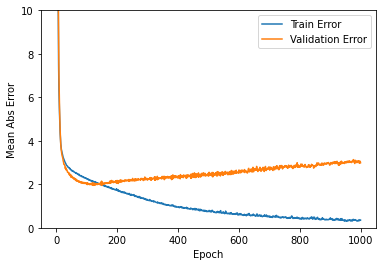

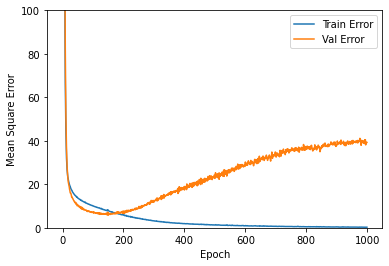

In [318]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Validation Error')
    plt.ylim([0,10])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,100])
    plt.legend()
    plt.show()
    
plot_history(history)

In [299]:
mse = model.evaluate(X_test_n, test_labels,verbose=0)
print("Testing set Mean Abs Error: ", mse)

Testing set Mean Abs Error:  [22.247169494628906, 3.1613826751708984, 22.247169494628906]


12/12 [==============================] - 0s 2ms/step


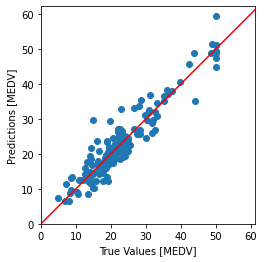

In [152]:
test_predictions = model.predict(X_test_n).flatten()
train_predictions = model.predict(X_train_n).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100],color='red')
plt.show()

### Regularization

In [153]:
# create model
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=2e-0)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# compile and run model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mae','mse'])
history = model.fit(X_train_n, train_labels, epochs = 1000,validation_split = 0.2)

Epoch 1/1000
9/9 [==============================] - 1s 36ms/step - loss: 594.8826 - mae: 21.8297 - mse: 550.3188 - val_loss: 703.6829 - val_mae: 23.7694 - val_mse: 660.3917
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 563.3383 - mae: 21.1770 - mse: 520.9459 - val_loss: 671.8143 - val_mae: 23.1376 - val_mse: 630.4899
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 532.4553 - mae: 20.4894 - mse: 491.8062 - val_loss: 635.6979 - val_mae: 22.3877 - val_mse: 595.7958
Epoch 4/1000
9/9 [==============================] - 0s 6ms/step - loss: 496.5052 - mae: 19.6266 - mse: 456.9683 - val_loss: 589.5023 - val_mae: 21.3793 - val_mse: 550.3149
Epoch 5/1000
9/9 [==============================] - 0s 6ms/step - loss: 450.5424 - mae: 18.4681 - mse: 411.4404 - val_loss: 530.5887 - val_mae: 20.0689 - val_mse: 491.4668
Epoch 6/1000
9/9 [==============================] - 0s 7ms/step - loss: 395.9504 - mae: 16.9600 - mse: 356.5841 - val_loss: 458.4711 - val_

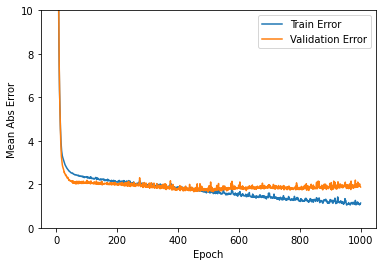

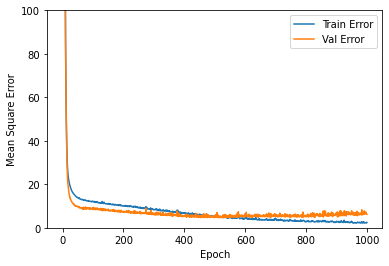

In [154]:
plot_history(history)

Testing set Mean Abs Error:  [9.463397026062012, 2.070420742034912, 8.134160041809082]
12/12 [==============================] - 0s 929us/step


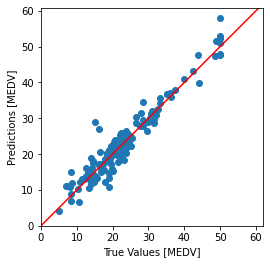

In [155]:
mse = model.evaluate(X_test_n, test_labels,verbose=0)
print("Testing set Mean Abs Error: ", mse)

test_predictions = model.predict(X_test_n).flatten()
train_predictions = model.predict(X_train_n).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100],color='red')
plt.show()

## Early stopping

In [179]:
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mae','mse'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_n, train_labels, epochs = 1000,validation_split = 0.2, verbose=1, callbacks=[early_stop])

Epoch 1/1000
9/9 [==============================] - 1s 31ms/step - loss: 566.8926 - mae: 21.2176 - mse: 523.7794 - val_loss: 666.7208 - val_mae: 22.9943 - val_mse: 624.5108
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 527.3888 - mae: 20.3009 - mse: 485.7010 - val_loss: 620.7645 - val_mae: 22.0121 - val_mse: 579.6418
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 483.8900 - mae: 19.2494 - mse: 443.0141 - val_loss: 568.3882 - val_mae: 20.8698 - val_mse: 527.6896
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 434.3923 - mae: 17.9626 - mse: 393.6265 - val_loss: 504.4970 - val_mae: 19.4564 - val_mse: 463.5271
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 373.5762 - mae: 16.3054 - mse: 332.2703 - val_loss: 429.6173 - val_mae: 17.7125 - val_mse: 387.7632
Epoch 6/1000
9/9 [==============================] - 0s 5ms/step - loss: 305.0082 - mae: 14.2206 - mse: 262.5976 - val_loss: 344.4951 - val_

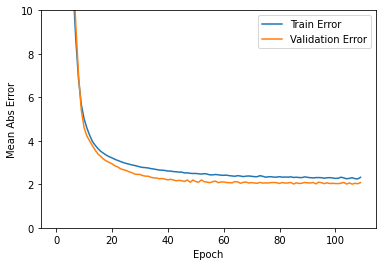

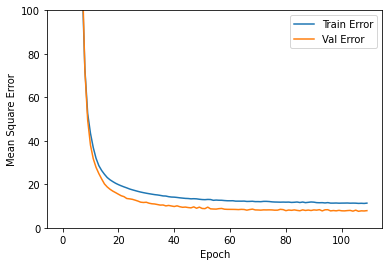

In [168]:
plot_history(history)

Testing set Mean Abs Error:  [16.56316566467285, 2.480380058288574, 12.451401710510254]
12/12 [==============================] - 0s 1ms/step


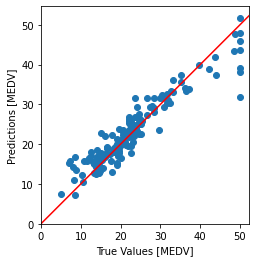

In [169]:
mse = model.evaluate(X_test_n, test_labels,verbose=0)
print("Testing set Mean Abs Error: ", mse)

test_predictions = model.predict(X_test_n).flatten()
train_predictions = model.predict(X_train_n).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100],color='red')
plt.show()

## Dropout

In [161]:
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=2e-0)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mae','mse'])

history = model.fit(X_train_n, train_labels, epochs = 1000,validation_split = 0.2, verbose=1)

Epoch 1/1000
9/9 [==============================] - 1s 81ms/step - loss: 551.2119 - mae: 20.9978 - mse: 508.1024 - val_loss: 649.6300 - val_mae: 22.7890 - val_mse: 607.4523
Epoch 2/1000
9/9 [==============================] - 0s 7ms/step - loss: 511.7569 - mae: 20.1093 - mse: 470.0710 - val_loss: 599.9550 - val_mae: 21.7603 - val_mse: 558.7962
Epoch 3/1000
9/9 [==============================] - 0s 6ms/step - loss: 465.8098 - mae: 19.0133 - mse: 424.8714 - val_loss: 540.6742 - val_mae: 20.4544 - val_mse: 499.8951
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 410.7532 - mae: 17.6026 - mse: 369.9069 - val_loss: 467.1396 - val_mae: 18.7380 - val_mse: 426.0970
Epoch 5/1000
9/9 [==============================] - 0s 7ms/step - loss: 349.2596 - mae: 15.8150 - mse: 307.8942 - val_loss: 381.3178 - val_mae: 16.5180 - val_mse: 339.4442
Epoch 6/1000
9/9 [==============================] - 0s 6ms/step - loss: 270.3320 - mae: 13.2592 - mse: 227.9235 - val_loss: 290.6578 - val_

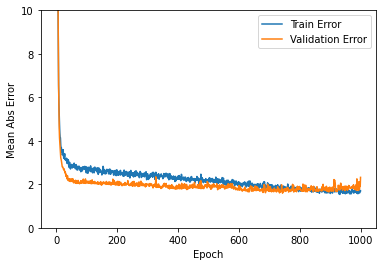

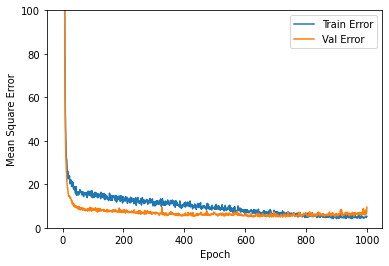

In [162]:
plot_history(history)

Testing set Mean Abs Error:  [12.42275333404541, 2.2593564987182617, 10.919650077819824]
12/12 [==============================] - 0s 1ms/step


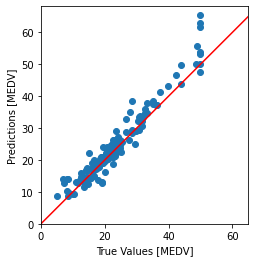

In [163]:
mse = model.evaluate(X_test_n, test_labels,verbose=0)
print("Testing set Mean Abs Error: ", mse)

test_predictions = model.predict(X_test_n).flatten()
train_predictions = model.predict(X_train_n).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100],color='red')
plt.show()